<a href="https://colab.research.google.com/github/tomlandon27/Cancer-Cell-AI-Detector/blob/main/Cancer_Cell_AI_Detector_Final_Project_Thomas_Landon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
import joblib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/KaggleAPI/kaggle.json ~/.kaggle/kaggle.json

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download uciml/breast-cancer-wisconsin-data/

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/versions/
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 1.39MB/s]


In [7]:
import pandas as pd
data = pd.read_csv('/content/breast-cancer-wisconsin-data.zip')

In [8]:
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Preprocessing

In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
# Remove rows with missing values
data_cleaned = data.dropna()

# Verify that there are no more missing values
print(data_cleaned.isnull().sum())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
Unnamed: 32                0
dtype: int64


In [12]:
data_cleaned = data.drop(['id', 'Unnamed: 32'], axis=1)

In [13]:
print(data_cleaned.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [14]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = data_cleaned.drop(['diagnosis'], axis=1)  # Assuming 'diagnosis' is the target variable
y = data_cleaned['diagnosis']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Separate features and target variable
X = data_cleaned.drop(['diagnosis'], axis=1)  # Assuming 'diagnosis' is the target variable
y = data_cleaned['diagnosis']

# Convert the scaled data back to a DataFrame
X_standardized_df = pd.DataFrame(X_standardized, columns=X.columns)

# Print the first few rows to verify
print("Standardized data:\n", X_standardized_df.head())

Standardized data:
    radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_w

# Advanced Exploratory Data Analysis

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-16-b1c86e72e32d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=data_cleaned, palette='viridis')


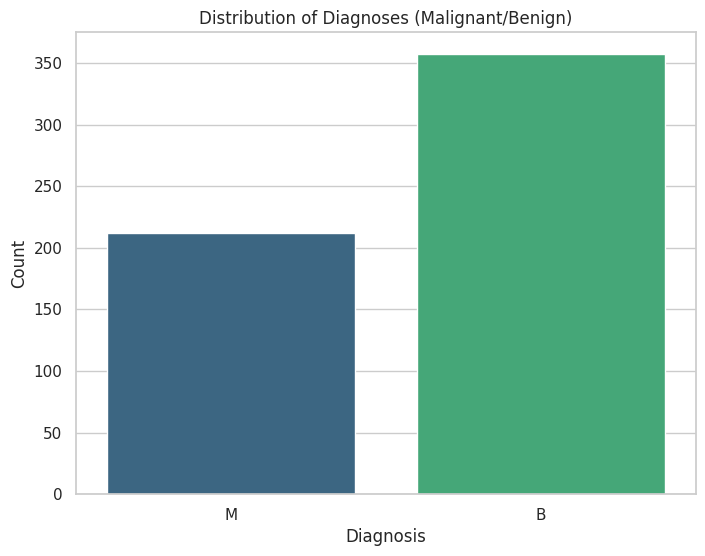

In [16]:
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data_cleaned, palette='viridis')

# Add titles and labels
plt.title('Distribution of Diagnoses (Malignant/Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Show the plot
plt.show()


Optional Advanced Visualization Techniques

<ipython-input-17-036823d82d72>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y='radius_mean', data=data_cleaned, palette='viridis')


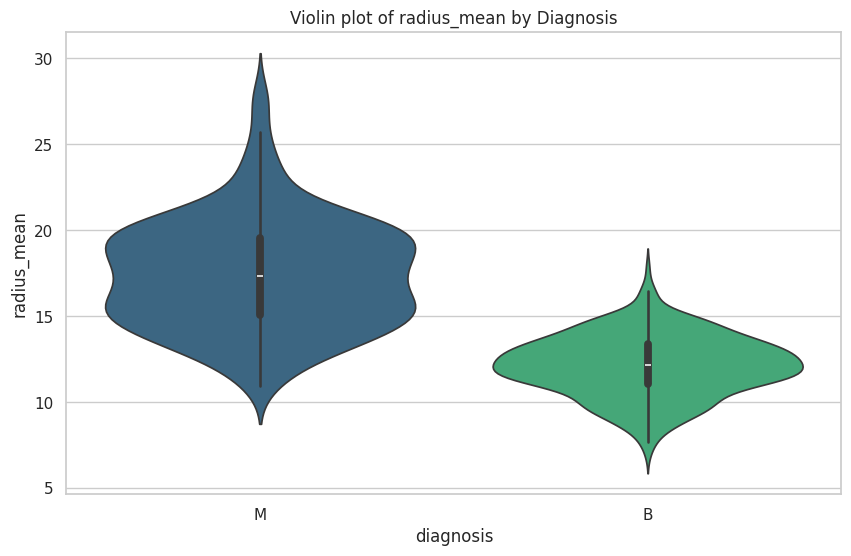

In [17]:
# Create a violin plot for a specific feature, e.g., 'radius_mean'
plt.figure(figsize=(10, 6))
sns.violinplot(x='diagnosis', y='radius_mean', data=data_cleaned, palette='viridis')
plt.title('Violin plot of radius_mean by Diagnosis')
plt.show()


<ipython-input-18-a1e2aa16f874>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='diagnosis', y='radius_mean', data=data_cleaned, palette='viridis')


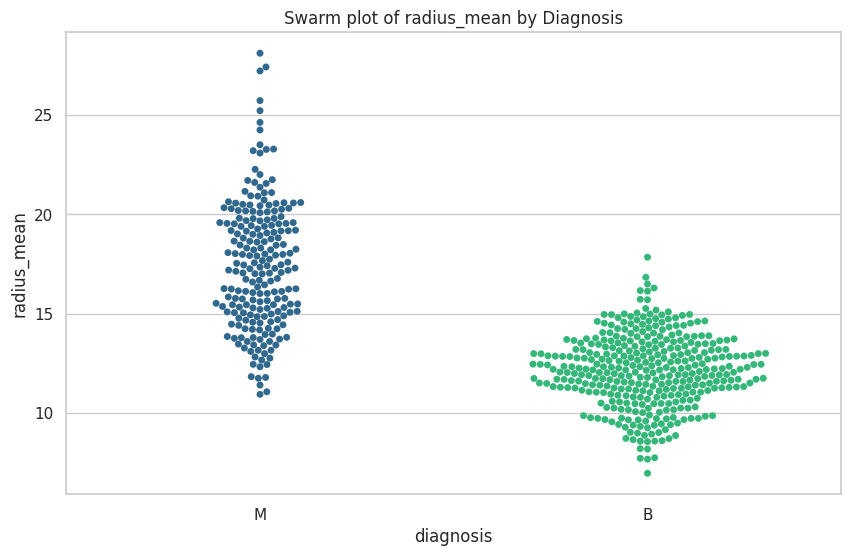

In [18]:
# Create a swarm plot for the same feature
plt.figure(figsize=(10, 6))
sns.swarmplot(x='diagnosis', y='radius_mean', data=data_cleaned, palette='viridis')
plt.title('Swarm plot of radius_mean by Diagnosis')
plt.show()


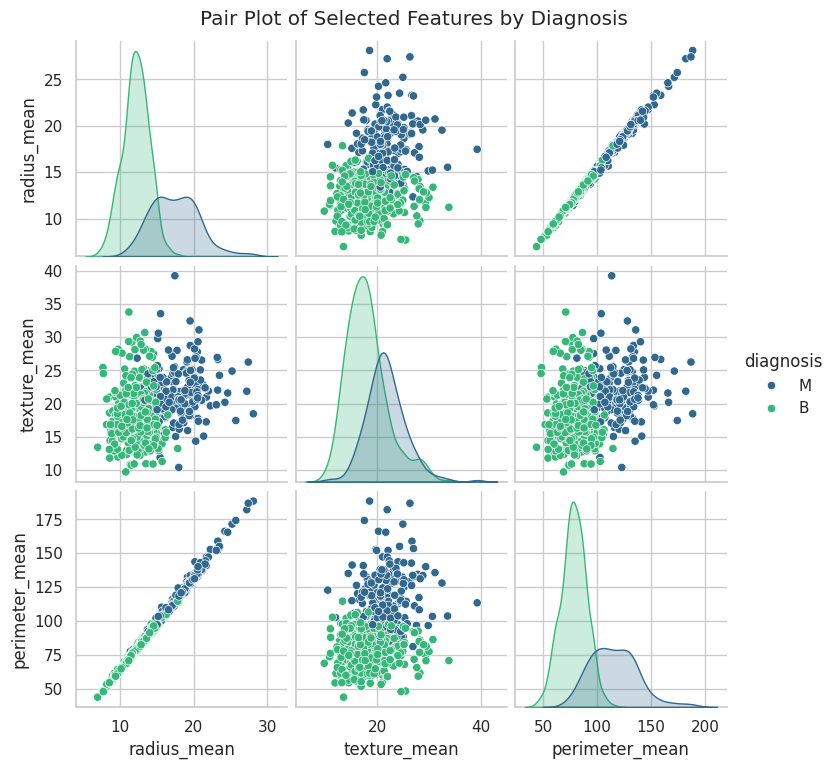

In [19]:
# Create a pair plot for a subset of features
sns.pairplot(data_cleaned, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean'], palette='viridis')
plt.suptitle('Pair Plot of Selected Features by Diagnosis', y=1.02)
plt.show()


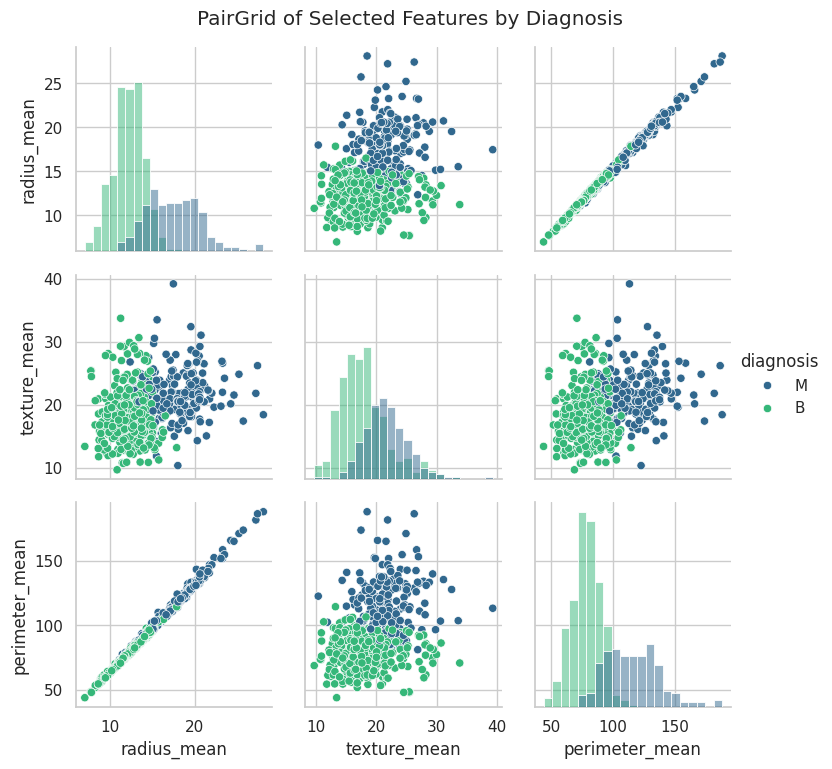

In [20]:
# Create a PairGrid for a subset of features
g = sns.PairGrid(data_cleaned, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean'], palette='viridis')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.suptitle('PairGrid of Selected Features by Diagnosis', y=1.02)
plt.show()


One-Hot Encoding the Diagnosis

In [21]:
# Check the data types of all columns
print(data_cleaned.dtypes)

# Convert categorical 'diagnosis' column to numeric
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

print(data_cleaned.dtypes)

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

Using a heatmap to visualize the correlation matrix of the features

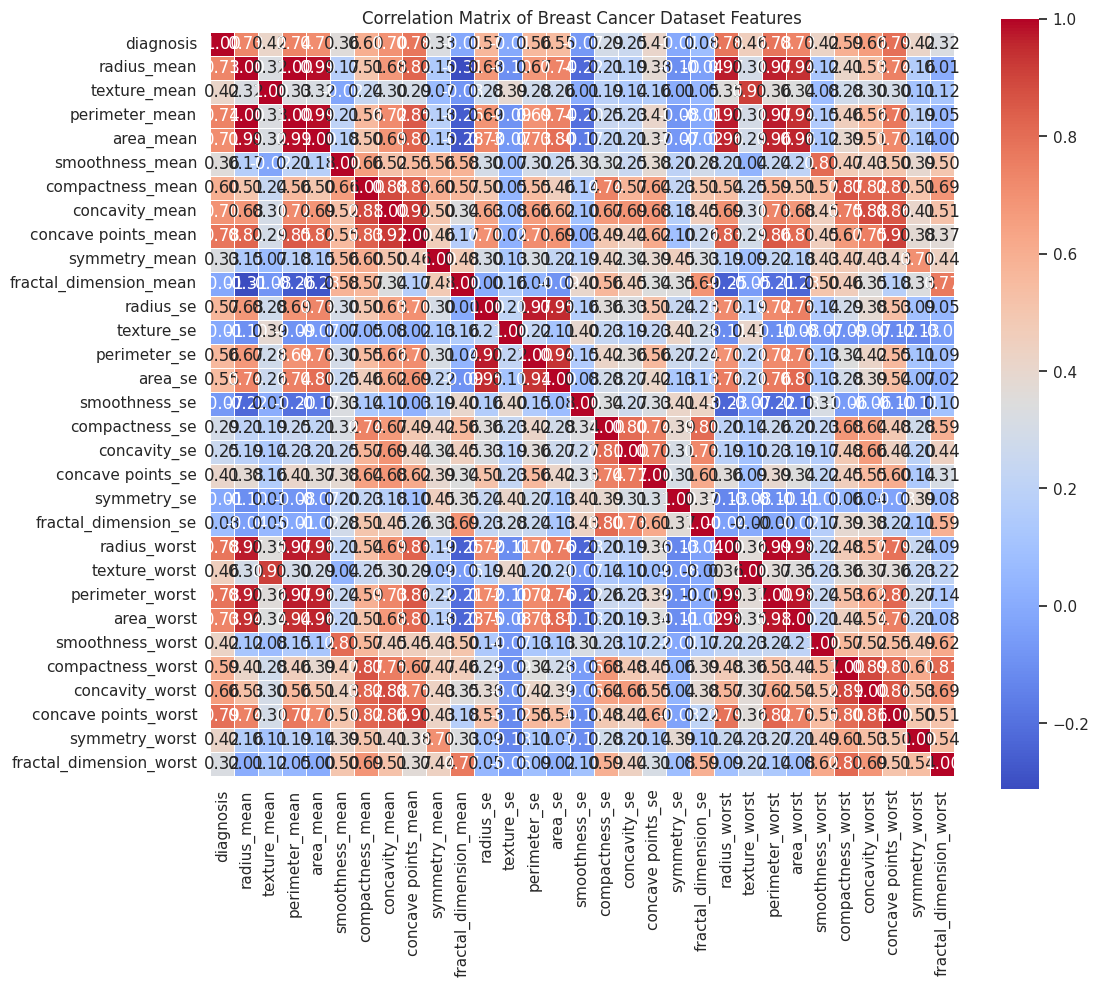

In [22]:
# Compute the correlation matrix
correlation_matrix = data_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add title and labels
plt.title('Correlation Matrix of Breast Cancer Dataset Features')
plt.show()


# Feature Selection Techniques

In [23]:
# Correlation-Based Selection

import numpy as np
# Set the correlation threshold
threshold = 0.9

# Find features with correlation above the threshold
highly_correlated_pairs = np.where(abs(correlation_matrix) > threshold)

# Create a list of features to remove
features_to_remove = set()

for i in range(len(highly_correlated_pairs[0])):
    # Get feature names
    feature1 = correlation_matrix.columns[highly_correlated_pairs[0][i]]
    feature2 = correlation_matrix.columns[highly_correlated_pairs[1][i]]

    # Avoid self-correlation
    if feature1 != feature2:
        features_to_remove.add(feature2)  # Mark feature2 for removal

# Remove features that are highly correlated
features_to_keep = [feature for feature in correlation_matrix.columns if feature not in features_to_remove]
data_reduced = data_cleaned[features_to_keep]

print("Features to keep:", features_to_keep)


Features to keep: ['diagnosis', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [24]:
# Display the shape of the reduced dataset
print("Reduced dataset shape:", data_reduced.shape)


Reduced dataset shape: (569, 17)


In [25]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

In [26]:
# Initialize SelectKBest with the chosen statistical measure
k = 10  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)

In [27]:
# Optional using SelectKBest

# Fit the selector to the data
selector.fit(X, y)

# Get the scores for each feature
scores = selector.scores_

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Transform the dataset to keep only selected features
X_selected = selector.transform(X)

print("Selected features:", selected_features)


Selected features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Initialize and fit the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)


RandomForestClassifier(random_state=42)

In [46]:
# Get feature importances from the classifier
importances = rf_classifier.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)


                    Feature  Importance
23               area_worst    0.139357
27     concave points_worst    0.132225
7       concave points_mean    0.107046
20             radius_worst    0.082848
22          perimeter_worst    0.080850
2            perimeter_mean    0.067990
6            concavity_mean    0.066917
3                 area_mean    0.060462
26          concavity_worst    0.037339
0               radius_mean    0.034843
13                  area_se    0.029553
25        compactness_worst    0.019864
21            texture_worst    0.017485
1              texture_mean    0.015225
10                radius_se    0.014264
24         smoothness_worst    0.012232
5          compactness_mean    0.011597
12             perimeter_se    0.010085
28           symmetry_worst    0.008179
4           smoothness_mean    0.007958
19     fractal_dimension_se    0.005942
16             concavity_se    0.005820
15           compactness_se    0.005612
14            smoothness_se    0.004722


<ipython-input-47-2adf14b55b55>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


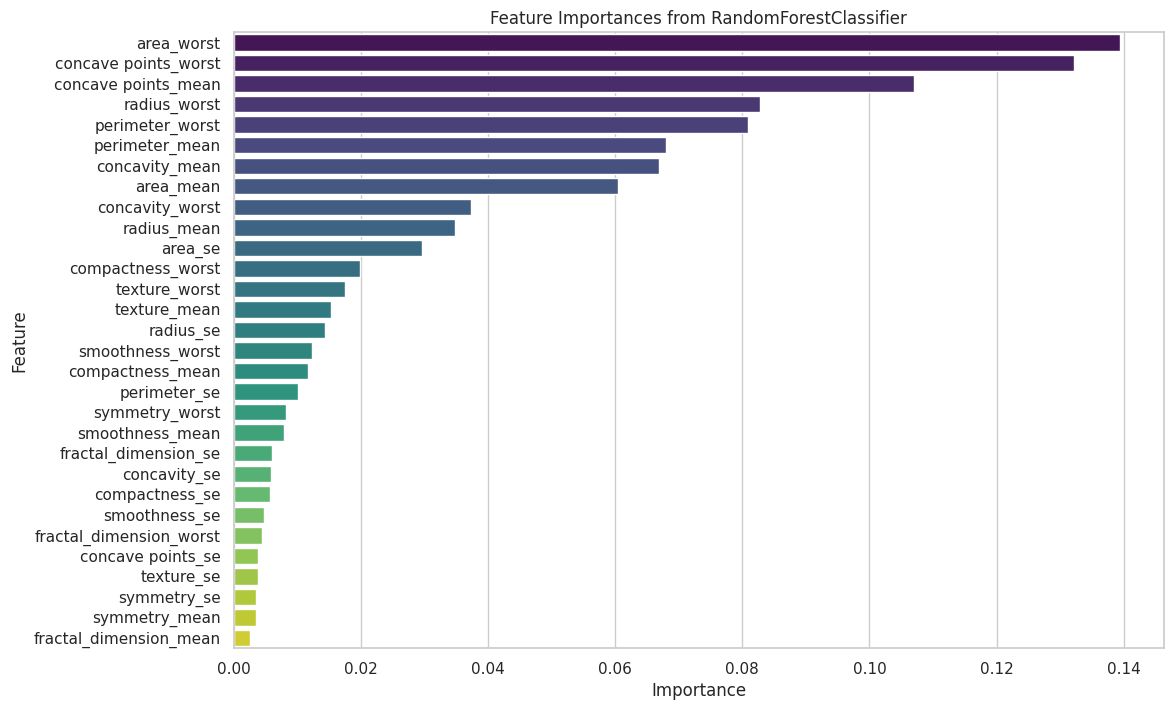

In [47]:
# Set the plot size
plt.figure(figsize=(12, 8))

# Create a bar plot of feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')

# Add titles and labels
plt.title('Feature Importances from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Show the plot
plt.show()


# Feature Extraction with PCA

In [33]:
from sklearn.decomposition import PCA

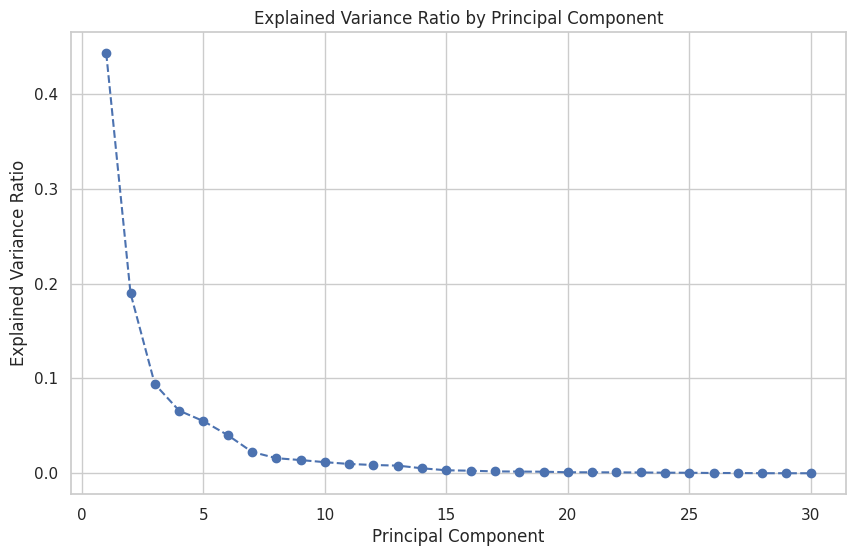

In [34]:
# Initialize and fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_standardized.shape[1])])

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Model Development, Evaluation, and Optimization

In [35]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training feature set shape: {X_train.shape}")
print(f"Testing feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Testing target set shape: {y_test.shape}")


Training feature set shape: (455, 30)
Testing feature set shape: (114, 30)
Training target set shape: (455,)
Testing target set shape: (114,)


In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Confusion Matrix:
[[70  1]
 [ 3 40]]


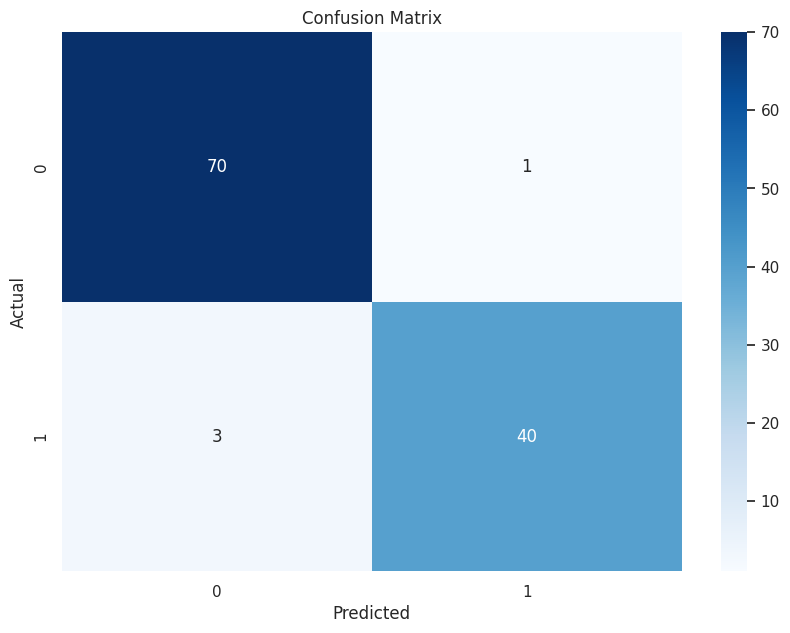


Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Accuracy Score:
0.9649122807017544

Cross-Validation Scores:
[0.94736842 0.98245614 0.96491228 0.9122807  0.94736842 0.96491228
 0.96491228 0.94736842 0.92982456 1.        ]

Mean Cross-Validation Score:
0.956140350877193


In [49]:
# Training the model

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:")
print(accuracy)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_standardized, y, cv=skf)

# Print cross-validation scores
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nMean Cross-Validation Score:")
print(cv_scores.mean())


In [40]:
#Optimizing the model using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,
                                   n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Train the RandomForestClassifier with the best parameters
optimized_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
optimized_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
optimized_y_pred = optimized_rf_classifier.predict(X_test)

# Evaluate the optimized model
print("Confusion Matrix:")
print(confusion_matrix(y_test, optimized_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, optimized_y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, optimized_y_pred))

# Perform cross-validation on the optimized model
optimized_cv_scores = cross_val_score(optimized_rf_classifier, X_standardized, y, cv=skf)

# Print cross-validation scores
print("\nOptimized Cross-Validation Scores:")
print(optimized_cv_scores)
print("\nMean Optimized Cross-Validation Score:")
print(optimized_cv_scores.mean())


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}
Confusion Matrix:
[[70  1]
 [ 3 40]]

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Accuracy Score:
0.9649122807017544

Optimized Cross-Validation Scores:
[0.94736842 0.98245614 0.96491228 0.89473684 0.94736842 0.96491228
 0.98245614 0.96491228 0.92982456 1.        ]

Mean Optimized Cross-Validation Score:
0.9578947368421051


In [ ]:
# Optimizing the model using GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the RandomForestClassifier with the best parameters
optimized_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
optimized_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
optimized_y_pred = optimized_rf_classifier.predict(X_test)

# Evaluate the optimized model
print("Confusion Matrix:")
print(confusion_matrix(y_test, optimized_y_pred))
print("\nClassification Report:")
print(classification_report(y_test, optimized_y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, optimized_y_pred))

# Perform cross-validation on the optimized model
optimized_cv_scores = cross_val_score(optimized_rf_classifier, X_standardized, y, cv=skf)

# Print cross-validation scores
print("\nOptimized Cross-Validation Scores:")
print(optimized_cv_scores)
print("\nMean Optimized Cross-Validation Score:")
print(optimized_cv_scores.mean())


Confusion Matrix:
[[70  1]
 [ 3 40]]


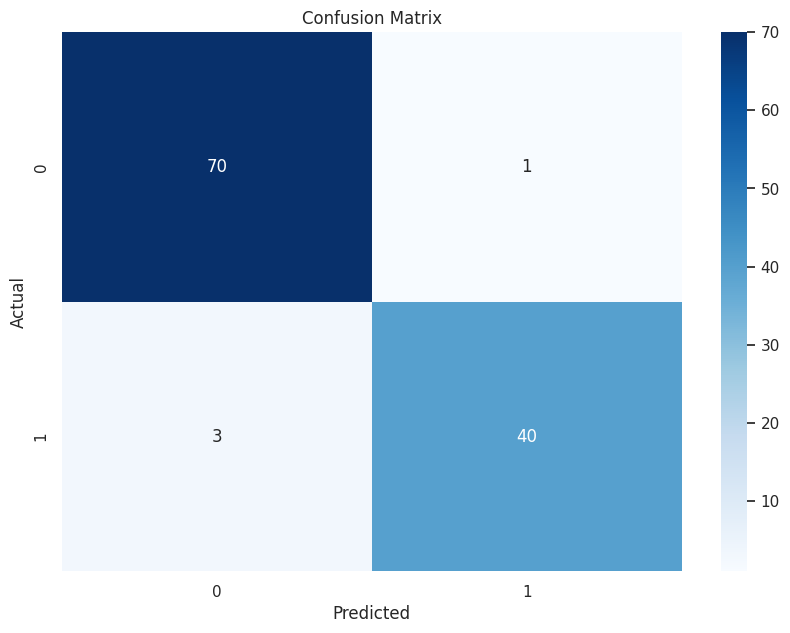


Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Accuracy Score:
0.9649122807017544

Cross-Validation Scores:
[0.94736842 0.98245614 0.98245614 0.87719298 0.94736842 0.96491228
 0.96491228 0.92982456 0.92982456 1.        ]

Mean Cross-Validation Score:
0.9526315789473683


In [42]:
# Rerunning to see the results again with the new features

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(**{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:")
print(accuracy)

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_standardized, y, cv=skf)

# Print cross-validation scores
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nMean Cross-Validation Score:")
print(cv_scores.mean())

In [43]:
print(y_pred)

['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M']


In [44]:
joblib.dump(rf_classifier, 'model.joblib')

['model.joblib']